In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from pandas import to_datetime
from datetime import datetime



In [2]:
#定义并观察数据表结构 
data=pd.read_csv('d:/BaiduNetdiskDownload/tap4fun/tap_fun_train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288007 entries, 0 to 2288006
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float64(13), int64(95), object(1)
memory usage: 1.9+ GB


In [3]:
data.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


In [4]:
#字段的说明
#字段名	字段解释	数据时间	变量性质
#user_id	玩家唯一ID	永久	ID
#register_time	玩家注册时间	永久	自变量
#wood_add_value	木头获取数量	前七日	自变量
#wood_reduce_value	木头消耗数量	前七日	自变量
#stone_add_value	石头获取数量	前七日	自变量
#stone_reduce_value	石头消耗数量	前七日	自变量
#ivory_add_value	象牙获取数量	前七日	自变量
#ivory_reduce_value	象牙消耗数量	前七日	自变量
#meat_add_value	肉获取数量	前七日	自变量
#meat_reduce_value	肉消耗数量	前七日	自变量
#magic_add_value	魔法获取数量	前七日	自变量
#magic_reduce_value	魔法消耗数量	前七日	自变量
#infantry_add_value	勇士招募数量	前七日	自变量
#infantry_reduce_value	勇士损失数量	前七日	自变量
#cavalry_add_value	驯兽师招募数量	前七日	自变量
#cavalry_reduce_value	驯兽师损失数量	前七日	自变量
#shaman_add_value	萨满招募数量	前七日	自变量
#shaman_reduce_value	萨满损失数量	前七日	自变量
#wound_infantry_add_value	勇士伤兵产生数量	前七日	自变量
#wound_infantry_reduce_value	勇士伤兵恢复数量	前七日	自变量
#wound_cavalry_add_value	驯兽师伤兵产生数量	前七日	自变量
#wound_cavalry_reduce_value	驯兽师伤兵恢复数量	前七日	自变量
#wound_shaman_add_value	萨满伤兵产生数量	前七日	自变量
#wound_shaman_reduce_value	萨满伤兵恢复数量	前七日	自变量
#general_acceleration_add_value	通用加速获取数量	前七日	自变量
#general_acceleration_reduce_value	通用加速使用数量	前七日	自变量
#building_acceleration_add_value	建筑加速获取数量	前七日	自变量
#building_acceleration_reduce_value	建筑加速使用数量	前七日	自变量
#reaserch_acceleration_add_value	科研加速获取数量	前七日	自变量
#reaserch_acceleration_reduce_value	科研加速使用数量	前七日	自变量
#training_acceleration_add_value	训练加速获取数量	前七日	自变量
#training_acceleration_reduce_value	训练加速使用数量	前七日	自变量
#treatment_acceleraion_add_value	治疗加速获取数量	前七日	自变量
#treatment_acceleration_reduce_value	治疗加速使用数量	前七日	自变量
#bd_training_hut_level	建筑：士兵小屋等级	前七日	自变量
#bd_healing_lodge_level	建筑：治疗小井等级	前七日	自变量
#bd_stronghold_level	建筑：要塞等级	前七日	自变量
#bd_outpost_portal_level	建筑：据点传送门等级	前七日	自变量
#d_barrack_level	建筑：兵营等级	前七日	自变量
#bd_healing_spring_level	建筑：治疗之泉等级	前七日	自变量
#bd_dolmen_level	建筑：智慧神庙等级	前七日	自变量
#d_guest_cavern_level	建筑：联盟大厅等级	前七日	自变量
#d_warehouse_level	建筑：仓库等级	前七日	自变量
#d_watchtower_level	建筑：瞭望塔等级	前七日	自变量
#d_magic_coin_tree_level	建筑：魔法幸运树等级	前七日	自变量
#d_hall_of_war_level	建筑：战争大厅等级	前七日	自变量
#d_market_level	建筑：联盟货车等级	前七日	自变量
#d_hero_gacha_level	建筑：占卜台等级	前七日	自变量
#d_hero_strengthen_level	建筑：祭坛等级	前七日	自变量
#d_hero_pve_level	建筑：冒险传送门等级	前七日	自变量
#r_scout_level	科研：侦查等级	前七日	自变量
#r_training_speed_level	科研：训练速度等级	前七日	自变量
#r_infantry_tier_2_level	科研：守护者	前七日	自变量
#r_cavalry_tier_2_level	科研：巨兽驯兽师	前七日	自变量
#sr_shaman_tier_2_level	科研：吟唱者	前七日	自变量
#r_infantry_atk_level	科研：勇士攻击	前七日	自变量
#sr_cavalry_atk_level	科研：驯兽师攻击	前七日	自变量
#r_shaman_atk_level	科研：萨满攻击	前七日	自变量
#r_infantry_tier_3_level	科研：战斗大师	前七日	自变量
#sr_cavalry_tier_3_level	科研：高阶巨兽骑兵	前七日	自变量
#sr_shaman_tier_3_level	科研：图腾大师	前七日	自变量
#sr_troop_defense_level	科研：部队防御	前七日	自变量
#sr_infantry_def_level	科研：勇士防御	前七日	自变量
#sr_cavalry_def_level	科研：驯兽师防御	前七日	自变量
#sr_shaman_def_level	科研：萨满防御	前七日	自变量
#sr_infantry_hp_level	科研：勇士生命	前七日	自变量
#sr_cavalry_hp_level	科研：驯兽师生命	前七日	自变量
#sr_shaman_hp_level	科研：萨满生命	前七日	自变量
#sr_infantry_tier_4_level	科研：狂战士	前七日	自变量
#sr_cavalry_tier_4_level	科研：龙骑兵	前七日	自变量
#sr_shaman_tier_4_level	科研：神谕者	前七日	自变量
#sr_troop_attack_level	科研：部队攻击	前七日	自变量
#sr_construction_speed_level	科研：建造速度	前七日	自变量
#sr_hide_storage_level	科研：资源保护	前七日	自变量
#sr_troop_consumption_level	科研：部队消耗	前七日	自变量
#sr_rss_a_prod_levell	科研：木材生产	前七日	自变量
#sr_rss_b_prod_level	科研：石头生产	前七日	自变量
#sr_rss_c_prod_level	科研：象牙生产	前七日	自变量
#sr_rss_d_prod_level	科研：肉类生产	前七日	自变量
#sr_rss_a_gather_level	科研：木材采集	前七日	自变量
#sr_rss_b_gather_level	科研：石头采集	前七日	自变量
#sr_rss_c_gather_level	科研：象牙采集	前七日	自变量
#sr_rss_d_gather_level	科研：肉类生产	前七日	自变量
#sr_troop_load_level	科研：部队负重	前七日	自变量
#sr_rss_e_gather_level	科研：魔法采集	前七日	自变量
#sr_rss_e_prod_level	科研：魔法生产	前七日	自变量
#sr_outpost_durability_level	科研：据点耐久	前七日	自变量
#sr_outpost_tier_2_level	科研：据点二	前七日	自变量
#sr_healing_space_level	科研：医院容量	前七日	自变量
#sr_gathering_hunter_buff_level	科研：领土采集奖励	前七日	自变量
#sr_healing_speed_level	科研：治疗速度	前七日	自变量
#sr_outpost_tier_3_level	科研：据点三	前七日	自变量
#sr_alliance_march_speed_level	科研：联盟行军速度	前七日	自变量
#sr_pvp_march_speed_level	科研：战斗行军速度	前七日	自变量
#sr_gathering_march_speed_level	科研：采集行军速度	前七日	自变量
#sr_outpost_tier_4_level	科研：据点四	前七日	自变量
#sr_guest_troop_capacity_level	科研：增援部队容量	前七日	自变量
#sr_march_size_level	科研：行军大小	前七日	自变量
#sr_rss_help_bonus_level	科研：资源帮助容量	前七日	自变量
#pvp_battle_count	PVP次数	前七日	自变量
#pvp_lanch_count	主动发起PVP次数	前七日	自变量
#pvp_win_count	PVP胜利次数	前七日	自变量
#pve_battle_count	PVE次数	前七日	自变量
#pve_lanch_count	主动发起PVE次数	前七日	自变量
#pve_win_count	PVE胜利次数	前七日	自变量
#avg_online_minutes	在线时长	前七日	自变量
#pay_price	付费金额	前七日	自变量
#pay_count	付费次数	前七日	自变量
#prediction_pay_price	45日付费金额	前45日	因变量


In [5]:
#保留除去游戏道具及游戏内行为之后的数据为主要研究对象
col=['user_id','register_time','pvp_battle_count','pvp_lanch_count','pvp_win_count','pve_battle_count','pve_lanch_count','pve_win_count','avg_online_minutes','pay_price','pay_count','prediction_pay_price','bd_stronghold_level']
new=data[col]
new[:5000]


,user_id,register_time,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price,bd_stronghold_level
0,1,2018-02-02 19:47:15,0,0,0,0,0,0,0.333333,0.00,0,0.00,1
1,1593,2018-01-26 00:01:05,0,0,0,0,0,0,0.333333,0.00,0,0.00,0
2,1594,2018-01-26 00:01:58,0,0,0,0,0,0,1.166667,0.00,0,0.00,0
3,1595,2018-01-26 00:02:13,0,0,0,0,0,0,3.166667,0.00,0,0.00,0
4,1596,2018-01-26 00:02:46,0,0,0,0,0,0,2.333333,0.00,0,0.00,0
5,1597,2018-01-26 00:03:06,0,0,0,0,0,0,0.166667,0.00,0,0.00,0
6,1598,2018-01-26 00:03:45,0,0,0,0,0,0,4.000000,0.00,0,0.00,0
7,1599,2018-01-26 00:04:11,0,0,0,0,0,0,0.666667,0.00,0,0.00,0
8,1600,2018-01-26 00:06:01,0,0,0,0,0,0,1.833333,0.00,0,0.00,0
9,1601,2018-01-26 00:07:42,0,0,0,0,0,0,0.500000,0.00,0,0.00,0


In [6]:
#时间格式的处理
new['reg_time']=to_datetime(new['register_time'],format="%Y/%m/%d")
new['reg_time']=new['reg_time'].apply(lambda x: datetime.strftime(x,"%Y-%m-%d"))
new['reg_time'].head()

D:\ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\ana\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    2018-02-02
1    2018-01-26
2    2018-01-26
3    2018-01-26
4    2018-01-26
Name: reg_time, dtype: object

In [7]:
#研究表格
new.drop(columns=['register_time']).head()

,user_id,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price,bd_stronghold_level,reg_time
0,1,0,0,0,0,0,0,0.333333,0.0,0,0.0,1,2018-02-02
1,1593,0,0,0,0,0,0,0.333333,0.0,0,0.0,0,2018-01-26
2,1594,0,0,0,0,0,0,1.166667,0.0,0,0.0,0,2018-01-26
3,1595,0,0,0,0,0,0,3.166667,0.0,0,0.0,0,2018-01-26
4,1596,0,0,0,0,0,0,2.333333,0.0,0,0.0,0,2018-01-26


In [8]:
#1.新增用户分析：
#1.1新增用户统计：根据不同的user_id得出共有2288007个新增用户
new = new.drop_duplicates(subset=['user_id'], keep='first')
new.user_id.count()



2288007

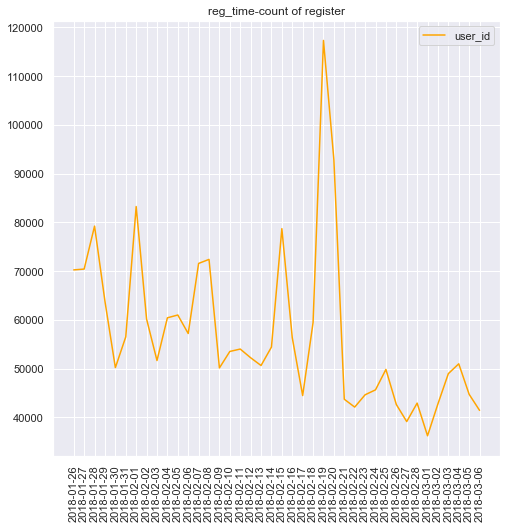

In [9]:
#每天新增用户数的情况：由图像可知在游戏运营期间有几次小的注册高峰 但是在2月19日以后迎来断崖式下降并且未来并没有大幅度上升 可能19日的上升
#与游戏活动有关或者游戏对各个推广的渠道增加了曝光 但在之后人数下降应该重新审核下活动内容或者曝光渠道
fig = plt.figure(figsize=(8, 8))
plt.plot(new.groupby(['reg_time']).user_id.count(),color='orange')
plt.xticks(rotation=90)
plt.title('reg_time-count of register')
plt.legend()
plt.show()

In [10]:
#1.2 新增付费用户统计：根据不同的user_id得出共有41439个新增付费用户
pay=new[new['pay_price']>0]
pay.user_id.count()

41439

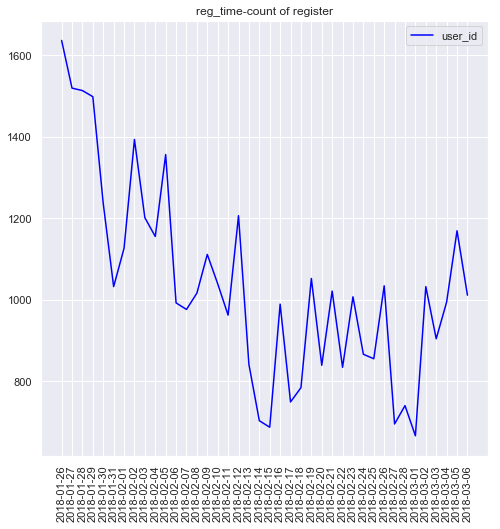

In [11]:
#每天新增付费用户数的情况：对比上图可知虽然19日以后游戏注册人数大幅度下跌但是付费用户数有所增加 由此可知此次活动或者宣传在付费玩家群体有了
#很好的效果
fig = plt.figure(figsize=(8, 8))
plt.plot(new[new['pay_price']>0].groupby(['reg_time']).user_id.count(),color='blue')
plt.xticks(rotation=90)
plt.title('reg_time-count of register')
plt.legend()
plt.show()

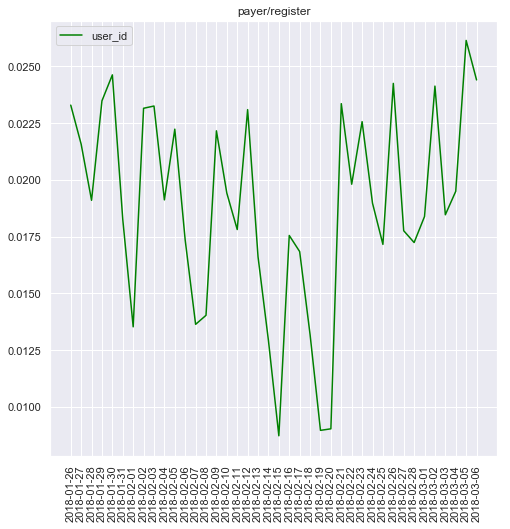

In [12]:
#1.3付费玩家/注册用户占比情况 在整个时间周期内总体来看付费玩家比率有所上升，可能是属于慢热化的游戏，后续可以继续针对付费用户群体进行活动
fig = plt.figure(figsize=(8, 8))
plt.plot(new[new['pay_price']>0].groupby(['reg_time']).user_id.count()/new.groupby(['reg_time']).user_id.count(),color='green')
plt.xticks(rotation=90)
plt.legend()
plt.title('payer/register')
plt.show()

In [13]:
#2.活跃用户分析：
#2.1 利用k-means方法对活跃用户进行细分：根据在线时长列特征我们选取>30min以上并小于24h为活跃用户 表示他们和游戏互动性较高
new.avg_online_minutes.describe().T


count    2.288007e+06
mean     1.020749e+01
std      3.895946e+01
min      0.000000e+00
25%      5.000000e-01
50%      1.833333e+00
75%      4.833333e+00
max      2.049667e+03
Name: avg_online_minutes, dtype: float64

In [14]:
activate_user = new[(new['avg_online_minutes']>=30) & (new['avg_online_minutes']<=24*60)]
activate_user_features = activate_user[['bd_stronghold_level', 'pvp_win_count', 'pve_win_count', 'avg_online_minutes','pay_count', 'pay_price']]


In [15]:
from sklearn.cluster import KMeans
model= KMeans(n_clusters=3)
result=model.fit_predict(activate_user_features)
label=model.labels_#每一类的列名称
avg=model.cluster_centers_#每一类的平均值
#将均值整合成DataFrame
result_data={'第一类':avg[0], 
              '第二类':avg[1],
              '第三类':avg[2]}
active_user_classification= pd.DataFrame(result_data, index=['要塞等级', 'pvp获胜次数', 'pve获胜次数', '日均在线时间','付费次数', '付费金额'])
active_user_classification

,第一类,第二类,第三类
要塞等级,17.255034,6.704097,9.769931
pvp获胜次数,94.778523,8.098560,47.099331
pve获胜次数,89.093960,23.988634,83.276532
日均在线时间,445.095078,79.059088,349.521771
付费次数,41.409396,0.479107,2.884207
付费金额,2202.525503,2.309391,31.762888


In [16]:
quantity = pd.Series(model.labels_).value_counts()
quantity
#第一类玩家各项指标都较低，可命名为萌新玩家, 样本量为125134 
#第二类玩家的各项指标均高于第一类玩家，可命名为中端活跃玩家, 样本量为17777
#第三类玩家所有指标都显著高于前两类玩家，可命名为高端死忠玩家，149 实际可以针对不同的用户群体进行活动策划

1    125116
2     17795
0       149
dtype: int64

In [17]:
#3.付费分析（付费率，ARPU，ARPPU）
#3.1付费率=付费人数/活跃用户
cols=['user_id','register_time','pvp_battle_count','pvp_lanch_count','pvp_win_count','pve_battle_count','pve_lanch_count','pve_win_count','avg_online_minutes','pay_price','pay_count','prediction_pay_price','bd_stronghold_level']
new=data[cols]
new['reg_time']=to_datetime(new['register_time'],format="%Y/%m/%d")
new['reg_time']=new['reg_time'].apply(lambda x: datetime.strftime(x,"%Y-%m-%d"))
new.drop(columns=['register_time'])
activate_user = new[(new['avg_online_minutes']>=30) & (new['avg_online_minutes']<=24*60)]
pay=new[new['pay_price']>0]
pay_rate=pay['user_id'].count()/activate_user['user_id'].count()
print('付费率为{}'.format(pay_rate))


D:\ana\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\ana\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


付费率为0.2896616804138124


In [18]:
#3.2ARPU =总付费金额/总活跃用户 
#目前较好的手游ARPU超过5元；一般的手游ARPU在3~5元之间；ARPU低于3元则说明表现较差。可见该手游的盈利能力较好。
ARPU=new['pay_price'].sum()/activate_user['user_id'].count()
print('ARPU为{}'.format(ARPU))

ARPU为8.551143995526354


In [19]:
#3.3ARPPU =总付费金额/总付费用户 
ARPPU=new['pay_price'].sum()/pay['user_id'].count()
print('ARPPU为{}'.format(ARPPU))

ARPPU为29.52114336735926


In [20]:
#3.4各等级的付费用户情况 用二维透视表进行分析
user = new[['user_id','bd_stronghold_level' , 'pay_count', 'pay_price']]
table=pd.pivot_table(user,index=['bd_stronghold_level'],values=['user_id', 'pay_count', 'pay_price'],aggfunc={'user_id': 'count', 'pay_count': 'sum', 'pay_price': 'sum'})
user_pay=pd.DataFrame(table.to_records())
#汇总各等级付费人数
pay_number = user[user['pay_count']>0].groupby('bd_stronghold_level').user_id.count()
user_pay['total_count'] = pay_number
#计算等级付费转化率，等级人均付费次数，等级人均付费总额
user_pay['user_payrate'] = user_pay['total_count'] / user_pay['user_id']
user_pay['user_avgcount'] = user_pay['pay_count'] / user_pay['total_count']
user_pay['user_avgmoney'] = user_pay['pay_price'] / user_pay['total_count']
user_pay.columns=['要塞等级','付费次数','付费总额','每级人数','每级付费人数','付费转化率','人均付费次数','人均付费总额']
#调整列名顺序
user_pay = user_pay[['要塞等级','每级人数','每级付费人数','付费次数','付费总额','付费转化率','人均付费次数','人均付费总额']]
user_pay

,要塞等级,每级人数,每级付费人数,付费次数,付费总额,付费转化率,人均付费次数,人均付费总额
0,0,940446,4324,9454,67774.46,0.004598,2.186401,15.674019
1,1,305723,500,843,4128.57,0.001635,1.686000,8.257140
2,2,283449,775,1315,8083.85,0.002734,1.696774,10.430774
3,3,158473,793,1428,7394.72,0.005004,1.800757,9.324994
4,4,174717,949,1599,7503.01,0.005432,1.684932,7.906228
5,5,161211,1259,2008,6424.92,0.007810,1.594917,5.103193
6,6,90890,1924,2988,7397.12,0.021168,1.553015,3.844657
7,7,69298,3424,5711,15127.89,0.049410,1.667932,4.418192
8,8,52106,5507,10518,31748.82,0.105688,1.909933,5.765175
9,9,31809,8584,20533,73356.67,0.269861,2.392008,8.545744


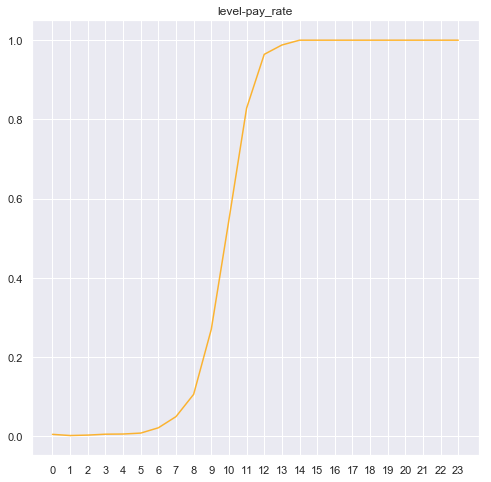

In [21]:
#要塞等级和付费转化率的关系
#可以观察到要塞等级和付费转化率有正相关的关系，在8级之后显著增长，在14级又趋于平稳
fig = plt.figure(figsize=(8,8))
x=user_pay['要塞等级']
y=user_pay['付费转化率']
plt.plot(x,y,color='orange',alpha=.8)
plt.grid(True)
plt.title('level-pay_rate')
plt.xticks(x,range(0,len(x),1))
plt.show()

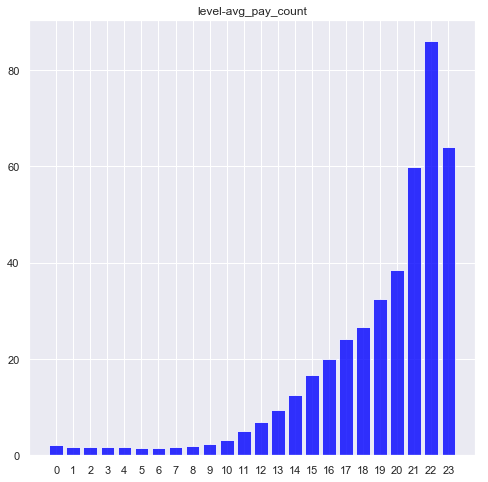

In [22]:
#要塞等级和人均付费次数的关系
fig = plt.figure(figsize=(8,8))
x=user_pay['要塞等级']
y=user_pay['人均付费次数']
plt.bar(x,y,color='blue',alpha=.8)
plt.grid(True)
plt.title('level-avg_pay_count')
plt.xticks(x,range(0,len(x),1))
plt.show()

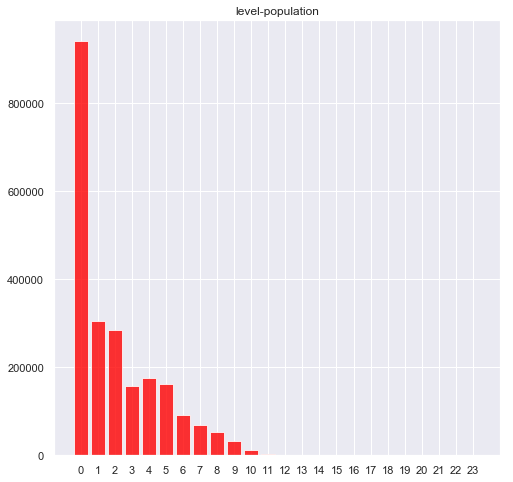

In [23]:
#到达人数和要塞等级的关系
fig = plt.figure(figsize=(8,8))
x=user_pay['要塞等级']
y=user_pay['每级人数']
plt.bar(x,y,color='red',alpha=.8)
plt.grid(True)
plt.title('level-population')
plt.xticks(x,range(0,len(x),1))
plt.show()

In [24]:
#观察可以发现：总体来说等级越高相应的变量值也就越大，比较突出的是：
#1.在14级之后付费率高达百分之百
#2.10级很突出，不仅为各参数突变的点，而且大量的游戏玩家集中在10级以下，因此，大量的用户集中在10以下，因此游戏的运营方向应该是如何让用户平滑的达到10级
#3.14级以上的用户为主要核心付费用户，应该加强留存及促进付费转化从而提高游戏收入


In [25]:
#4.玩家游戏内行为习惯(新设一个新表new_data)
#该游戏充值主要获得以下几种物品：资源类（木头、石头、象牙、肉、魔法等），加速券类（通用加速、建筑加速、科研加速、训练加速、治疗加速等）
#主要研究群体为10level以上玩家，将其分为高氪玩家（充值>500元），低氪玩家（充值<500)
a=['user_id','register_time','pvp_battle_count','pvp_lanch_count','pvp_win_count','pve_battle_count','pve_lanch_count','pve_win_count','avg_online_minutes','pay_price','pay_count','prediction_pay_price','bd_stronghold_level',
  'wood_reduce_value','stone_reduce_value','ivory_reduce_value','meat_reduce_value','magic_reduce_value',
  'general_acceleration_reduce_value','building_acceleration_reduce_value','reaserch_acceleration_reduce_value','training_acceleration_reduce_value','treatment_acceleration_reduce_value']
new_data=data[a]
high=new_data[(new_data['pay_price']>=500)&(new_data['bd_stronghold_level']>=10)]
low=new_data[(new_data['pay_price']<500)&(new_data['pay_price']>0)&(new_data['bd_stronghold_level']>=10)]

Text(0.5,1,'low_level-population')

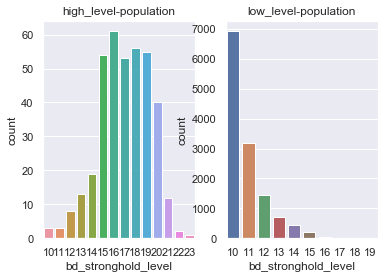

In [26]:
#高氪玩家和低氪玩家的人数在等级分布的情况,其中高氪玩家近似正太分布
import seaborn as sns
sns.set()
ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)
sns.countplot(x=high.bd_stronghold_level,data=high,ax=ax1)
sns.countplot(x=low.bd_stronghold_level,data=low,ax=ax2)
ax1.set_title('high_level-population')
ax2.set_title('low_level-population')

In [27]:
#4.1消费玩家资源类道具使用情况
wood_avg = [high['wood_reduce_value'].mean(), low['wood_reduce_value'].mean()]
stone_avg = [high['stone_reduce_value'].mean(), low['stone_reduce_value'].mean()]
ivory_avg = [high['ivory_reduce_value'].mean(), low['ivory_reduce_value'].mean()]
meat_avg = [high['meat_reduce_value'].mean(), low['meat_reduce_value'].mean()]
magic_avg = [high['magic_reduce_value'].mean(), low['magic_reduce_value'].mean()]
data = {'high_user':[wood_avg[0], stone_avg[0], ivory_avg[0], meat_avg[0], magic_avg[0]], 
        'low_user':[wood_avg[1], stone_avg[1], ivory_avg[1], meat_avg[1], magic_avg[1]]}
resource = pd.DataFrame(data, index=['wood', 'stone', 'ivory', 'meat', 'magic'])
#print('resource{}'.format(resource.info())
resource.head()

,high_user,low_user
wood,2.038481e+08,1.521733e+07
stone,1.913971e+08,1.030005e+07
ivory,1.043693e+08,2.904322e+06
meat,1.729356e+08,1.478841e+07
magic,2.181060e+07,1.781618e+06


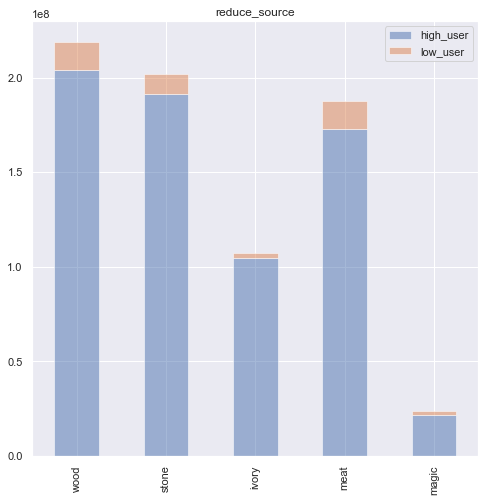

In [28]:
resource.plot(kind = 'bar',stacked=True,figsize=(8,8),legend=True,alpha=0.5)
plt.title('reduce_source')
plt.show()
#高消费玩家和低消费对木头、石头、肉这些基础类资源消耗都较大，魔法 象牙的消耗都较小
#在消耗小的资源上两种玩家的差距较大，象牙资源最能够体现出一个玩家在游戏上的消费水平。

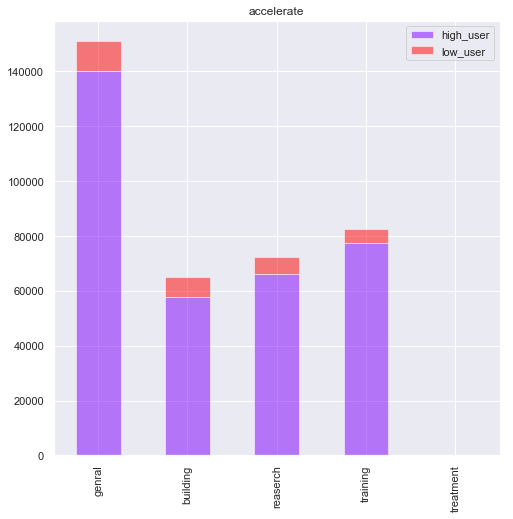

,high_user,low_user
genral,140062.355263,10856.638940
building,57893.944737,6996.087634
reaserch,66270.057895,6077.362673
training,77460.218421,5113.472811
treatment,137.539474,41.617435


In [29]:
#4.2消费玩家加速券使用情况
genral_avg = [high['general_acceleration_reduce_value'].mean(),low['general_acceleration_reduce_value'].mean()]
building_avg = [high['building_acceleration_reduce_value'].mean(),low['building_acceleration_reduce_value'].mean()]
reaserch_avg = [high['reaserch_acceleration_reduce_value'].mean(),low['reaserch_acceleration_reduce_value'].mean()]
training_avg = [high['training_acceleration_reduce_value'].mean(),low['training_acceleration_reduce_value'].mean()]
treament_avg = [high['treatment_acceleration_reduce_value'].mean(),low['treatment_acceleration_reduce_value'].mean()]
accelerate_data= {'high_user':[genral_avg[0], building_avg[0], reaserch_avg[0], training_avg[0], treament_avg[0]], 
        'low_user':[genral_avg[1], building_avg[1], reaserch_avg[1], training_avg[1], treament_avg[1]]}
accelerate= pd.DataFrame(accelerate_data,index = ['genral','building','reaserch','training','treatment'])
accelerate.plot(kind = 'bar',stacked=True,figsize=(8,8),legend=True,alpha=0.5,cmap='rainbow')
plt.title('accelerate')
plt.show()
accelerate
#两类玩家对对治疗加速券消耗都很小，对通用加速券的消耗差异较大，其他三种加速券消耗差别不大。
#高氪玩家更希望通过加快游戏进程增加游戏体验。

,high_user,low_user
avg_online-minutes,421.771053,260.112378


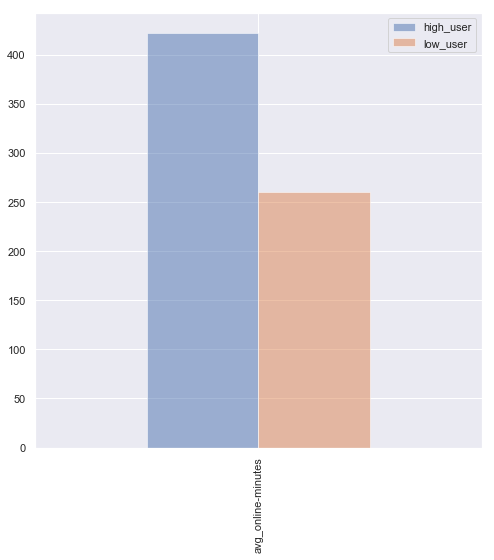

In [30]:
#4.3 pvp及pve
avg_online_minutes=[high['avg_online_minutes'].mean(),low['avg_online_minutes'].mean()]
data = {'high_user':[avg_online_minutes[0]], 
        'low_user':[avg_online_minutes[1]]}
online_time=pd.DataFrame(data, index = ['avg_online-minutes'])
online_time.plot(kind='bar',figsize=(8,8),legend=True,alpha=0.5)
online_time

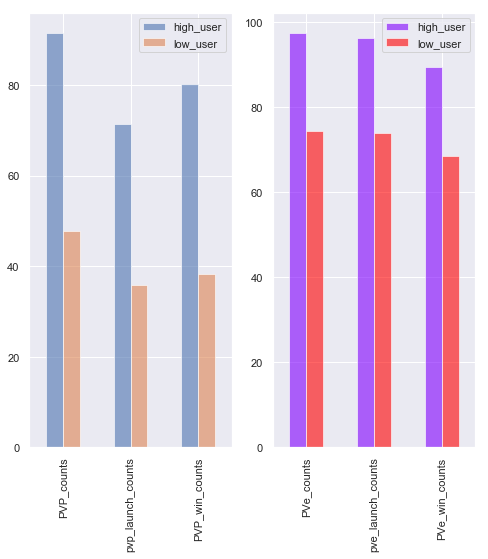

In [31]:
#pvp
ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)
pvp_battle_avg =[high['pvp_battle_count'].mean(),low['pvp_battle_count'].mean()]
pvp_lanch_avg =[high['pvp_lanch_count'].mean(),low['pvp_lanch_count'].mean()]
pvp_win_avg =[high['pvp_win_count'].mean(),low['pvp_win_count'].mean()]
pvp_data= {'high_user':[pvp_battle_avg[0], pvp_lanch_avg[0], pvp_win_avg[0]], 
        'low_user':[pvp_battle_avg[1], pvp_lanch_avg[1], pvp_win_avg[1]]}
PVP= pd.DataFrame(pvp_data,index = ['PVP_counts', 'pvp_launch_counts', 'PVP_win_counts'])
PVP.plot(kind='bar',figsize=(8,8),legend=True,alpha=0.6,ax=ax1)
#plt.title('pvp_analyse',ax=ax1)
#pve
pve_battle_avg =[high['pve_battle_count'].mean(),low['pve_battle_count'].mean()]
pve_lanch_avg =[high['pve_lanch_count'].mean(),low['pve_lanch_count'].mean()]
pve_win_avg =[high['pve_win_count'].mean(),low['pve_win_count'].mean()]
pve_data= {'high_user':[pve_battle_avg[0], pve_lanch_avg[0], pve_win_avg[0]], 
        'low_user':[pve_battle_avg[1], pve_lanch_avg[1], pve_win_avg[1]]}
PVe= pd.DataFrame(pve_data,index = ['PVe_counts', 'pve_launch_counts', 'PVe_win_counts'])
PVe.plot(kind='bar',figsize=(8,8),legend=True,alpha=0.6,ax=ax2,cmap='rainbow')
#plt.title('pve_analyse',ax=ax2)
plt.show()

In [32]:
#由此观察到：
#1.总体来说低氪玩家更倾向于和pve战斗，高氪玩家更倾向于和pvp战斗
#2.越是低氪玩家越是喜欢与pve战斗，而且总体来看pve的胜率会高一些，可能避免和高氪玩家装备形成正面对抗

In [33]:
#总结
#2.游戏的ARPU为8.55，说明该游戏的盈利能力较高
#3.在玩家行为上，高消费玩家投入游戏时间更多，它们更热衷于pvp玩法
#4.游戏的两级分化现象较为严重，多数都集中在10级之前，因此对于用户引流到10级的
#  平滑过渡以及14级以上的pvp设置尤为重要
